# Task-1: Student Pass/Fail Prediction

# Step 1: Import Libraries & Load Dataset

### 🔹 What we will do:
- Import required Python libraries.
- Load the dataset containing **Study Hours, Attendance, and Pass/Fail labels**.

### 🔹 Expected Output:
- Display first few rows of the dataset.
- Check for missing values.


  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31        68.267841                86   
1       S136    Male                    16        78.222927                73   
2       S209  Female                    21        87.525096                74   
3       S458  Female                    27        92.076483                99   
4       S078  Female                    37        98.655517                63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

   Final_Exam_Score Pass_F

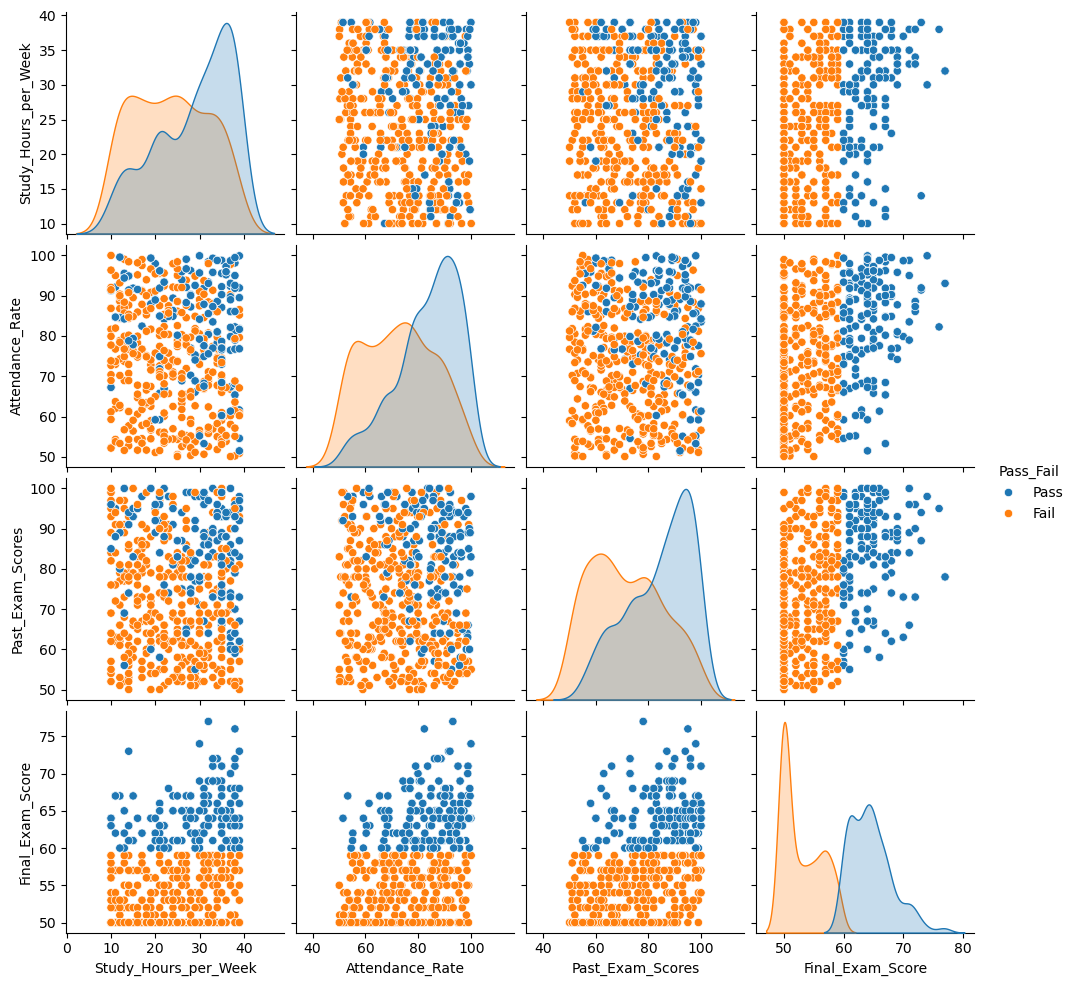

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("student_performance_dataset.csv")  # Ensure the file exists in Jupyter

# Show first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

# Visualizing the Data
sns.pairplot(df, hue="Pass_Fail")
plt.show()


#  Step 2: Data Preprocessing

### 🔹 What we will do:
- Ensure there are no missing values.
- Convert categorical data into numerical format if necessary.


In [5]:
print(df.isnull().sum())

df.drop_duplicates(inplace=True)

Q1 = df[['Study_Hours_per_Week', 'Attendance_Rate']].quantile(0.25)
Q3 = df[['Study_Hours_per_Week', 'Attendance_Rate']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df[['Study_Hours_per_Week', 'Attendance_Rate']] < lower_bound) | (df[['Study_Hours_per_Week', 'Attendance_Rate']] > upper_bound)).any(axis=1)]
print(f"Dataset after outlier removal: {df.shape}")


Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64
Dataset after outlier removal: (500, 10)


#  Step 3: Model Training

### 🔹 What we will do:
- Split data into training and testing sets.
- Train a **Logistic Regression Model**.
- Make predictions.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


X = df[['Study_Hours_per_Week', 'Attendance_Rate']]
y = df['Pass_Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


#  Step 4: Model Evaluation

### 🔹 What we will do:
- Calculate **Accuracy**.
- Display **Confusion Matrix**.


In [9]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Model Accuracy: 0.81
Confusion Matrix:
[[71  4]
 [15 10]]


#  Step 5: Save Model

### 🔹 What we will do:
- Save trained model using Joblib.


In [11]:
import joblib


joblib.dump(model, "student_pass_model.pkl")

print(" Model saved successfully!")


 Model saved successfully!


# Task-2: Sentiment Analysis with Natural Language Processing

#  Step 1: Import Libraries & Load Dataset

### 🔹 What we will do:
- Import Python libraries.
- Load the dataset containing **customer reviews**.

### 🔹 Expected Output:
- Display first few rows of the dataset.
- Check for missing values.


In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words("english"))

# Load dataset
df = pd.read_csv("Reviews.csv")  # Ensure file exists in Jupyter

# Show first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string  

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df_reviews = pd.read_csv("Reviews.csv")

df_reviews.dropna(subset=['ProfileName', 'Summary'], inplace=True)


def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(tokens)  # Join tokens back into a string


df_reviews['Processed_Review'] = df_reviews['Text'].apply(preprocess_text)


def map_sentiment(score):
    if score >= 4:
        return 1  # Positive
    elif score == 3:
        return 0  # Neutral
    else:
        return -1  # Negative

df_reviews['Sentiment'] = df_reviews['Score'].apply(map_sentiment)

# Display the processed dataset
df_reviews[['Text', 'Processed_Review', 'Score', 'Sentiment']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 2: Text Preprocessing

### 🔹 What we will do:
- Convert text to lowercase.
- Remove stopwords.
- Convert text into numerical format using **TF-IDF Vectorization**.


In [ ]:

df.dropna(inplace=True)


df['Cleaned_Review'] = df['Review Text'].apply(lambda x: " ".join([word.lower() for word in x.split() if word.lower() not in stop_words]))

# Convert text to numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Review'])

# Target variable
y = df['Sentiment'].map({'positive': 1, 'negative': 0})


#  Step 3: Model Training

### 🔹 What we will do:
- Split data into training and testing sets.
- Train **Logistic Regression Model**.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


#  Step 4: Model Evaluation

### 🔹 What we will do:
- Calculate **Accuracy**.
- Display **Classification Report**.


In [ ]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


#  Step 5: Save Model & Predictions

### 🔹 What we will do:
- Save trained **Sentiment Analysis Model**.
- Save **Predictions** in CSV format.


In [ ]:
import joblib


joblib.dump(model, "sentiment_model.pkl")

df_predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_predictions.to_csv("sentiment_predictions.csv", index=False)

print(" Sentiment Model & Predictions saved successfully!")
